## Project:7 Reduce Data Dimensionality for the House Dataset Attribute

### Problem Statement 

When the number of features is very large relative to the number of observations in your dataset, certain algorithms struggle to train effective models.

Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables. 

We are going to use principal component analysis, to reduce the data dimensions for the housing data attributes. 


## Data Description: 

•	Zoning_Class: Identifies the general zoning classification of the sale 

•	Building_Class: Identifies the type of dwelling involved in the sale 

•	Lot_Extent: Linear feet of street connected to property 

•	Lot_Size: Lot size in square feet 

•	Road_Type: Type of road access to property 

•	Lane_Type: Type of alley access to property 

•	Property_Shape: General shape of property 

•	Land_Outline: Flatness of the property 

•	Utility_Type: Type of utilities available 

•	Lot configuration: Lot configuration 

•	Property_Slope: Slope of property 

•	Neighborhood: Physical locations within Ames city limits 

•	Condition1: Proximity to various conditions 

•	Condition2: Proximity to various conditions (if more than one is present) 

•	House_Type: Type of dwelling 

•	House_Design: Style of dwelling 

•	Overall_Material: Rates the overall material and finish of the house 

•	House_Condition: Rates the overall condition of the house 

•	Construction_Year: Original construction date 

•	Remodel_Year: Remodel date (same as construction date if no remodeling or additions)

•	Roof_Design: Type of roof 

•	Roof_Quality: Roof material 

•	Exterior1st: Exterior covering on house 

•	Exterior2nd: Exterior covering on house (if more than one material) 

•	Brick_Veneer_Type: Masonry veneer type 

•	Brick_Veneer_Area: Masonry veneer area in square feet 

•	Exterior_Material: Evaluates the quality of the material on the exterior 

•	Exterior_Condition: Evaluates the present condition of the material on the exterior 

•	Foundation_Type: Type of foundation 

•	Basement_Height: Evaluates the height of the basement 

•	Basement_Condition: Evaluates the general condition of the basement 

•	Exposure_Level: Refers to walkout or garden level walls 

•	BsmtFinType1: Rating of basement finished area 

•	BsmtFinSF1: Type 1 finished square feet 

•	BsmtFinType2: Rating of basement finished area (if multiple types) 

•	BsmtFinSF2: Type 2 finished square feet

•	BsmtUnfSF: Unfinished square feet of basement area 

•	Total_Basement_Area: Total square feet of basement area

•	Heating_Type: Type of heating 

•	Heating_Quality: Heating quality and condition

•	Air_Conditioning: Central air conditioning 

•	Electrical_System: Electrical system 

•	First_Floor_Area: First Floor square feet

•	Second_Floor_Area: Second floor square feet 

•	LowQualFinSF: Low quality finished square feet (all floors) 

•	Grade_Living_Area: Above grade (ground) living area square feet

•	Underground_Full_Bathroom: Basement full bathrooms 

•	Underground_Half_Bathroom: Basement half bathrooms 

•	Full_Bathroom_Above_Grade: Full bathrooms above grade 

•	Half_Bathroom_Above_Grade: Half baths above grade 

•	Bedroom: Bedrooms above grade (does NOT include basement bedrooms) 

•	Kitchen: Kitchens above grade

•	Kitchen_Quality: Kitchen quality 

•	Rooms_Above_Grade: Total rooms above grade (does not include bathrooms) 

•	Functional_Rate: Home functionality (Assume typical unless deductions are warranted)

•	Fireplaces: Number of fireplaces 

•	Fireplace_Quality: quality of fireplaces 

•	Garage: Garage location 

•	Garage_Built_Year: Year garage was built 

•	Garage_Finish_Year: Interior finish of the garage

•	Garage_Size: Size of garage in car capacity 

•	Garage_Area: Size of garage in square feet 

•	Garage_Quality: Garage quality 

•	Garage_Condition: Garage condition 

•	Pavedd_Drive: Paved driveway 

•	W_Deck_Area: Wood deck area in square feet

•	Open_Lobby_Area: Open porch area in square feet 

•	Enclosed_Lobby_Area: Enclosed porch area in square feet 

•	Three_Season_Lobby_Area: Three season porch area in square feet

•	Screen_Lobby_Area: Screen porch area in square feet 

•	Pool_Area: Pool area in square feet 

•	Pool_Quality: Pool quality 

•	Fence_Quality: quality of fence 

•	Miscellaneous_Feature: Miscellaneous feature not covered in other categories 

•	Miscellaneous_Value: $Value of miscellaneous feature 

•	Month_Sold: Month Sold (MM) 

•	Year_Sold: Year Sold (YYYY) 

•	Sale_Type: Type of sale 

•	Sale_Condition: Condition of sale 


# Loading Important Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Check out the dataset

In [2]:
#Reading Datasetdf
df = pd.read_csv("house_price.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Exploratory Data Analysis

In [4]:
#Columns of dataset
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df.shape

(1460, 81)

House price has 81 columns(79 features + id and target SalePrice) and 1460 entries (number of rows or house sales)

In [6]:
#Counting numerical variables
numerical_var = df.dtypes[df.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_var))

#Counting categorical variables
categorical_var = df.dtypes[df.dtypes == "object"]
print("Number of Categorical features: ", len(categorical_var))

Number of Numerical features:  38
Number of Categorical features:  43


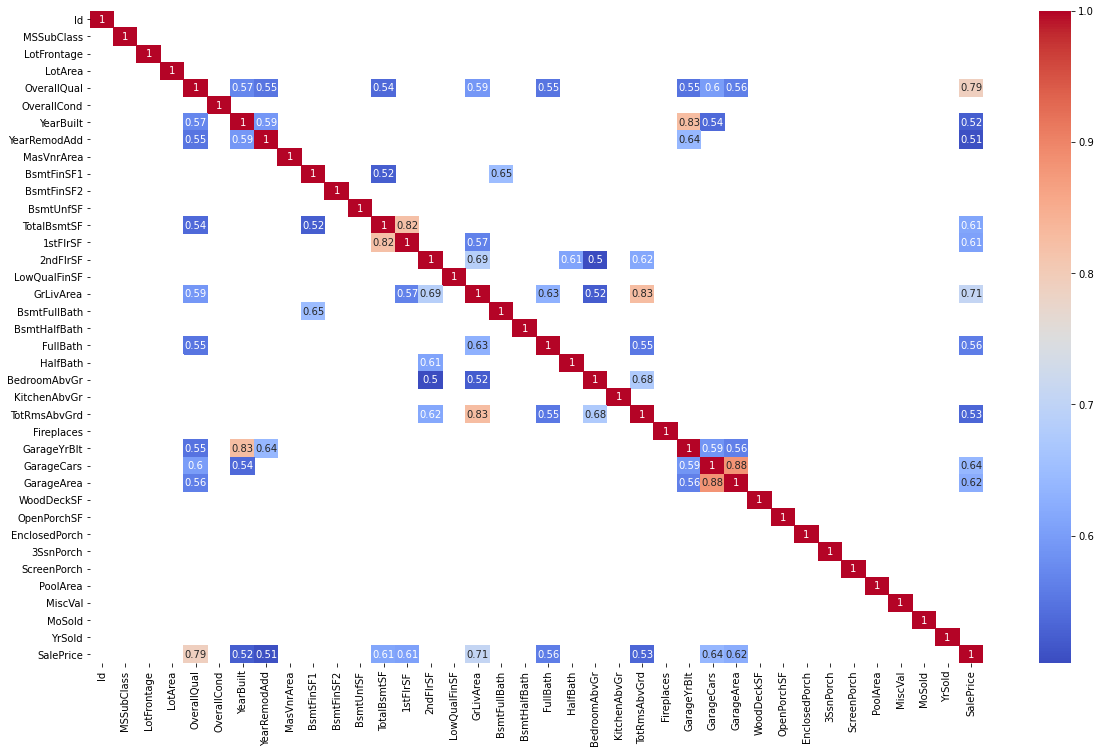

In [7]:
#filter numeric column only
data_num = df[numerical_var]

#calculating correlation among numeric variable
corr_matrix = data_num.corr()

#filter correlation values above 0.5
filter_corr = corr_matrix[corr_matrix > 0.5]

#plot correlation matrix
plt.figure(figsize=(20,12))
sns.heatmap(filter_corr,
            cmap="coolwarm",
            annot=True);

Based on the above correlation matrix, correlation among the variables been observed. For example, "salePrice" are
correlated with "OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmt", "1stFirSF", "GrLivArea", "FullBaath",
"TotRmsAbvGrd", "GarageCars", and "GarageArea".

It also show the multicollinearity. For example: the correlation betwen GarageCars and GarageArea is very high(0.88)

# SalePrice

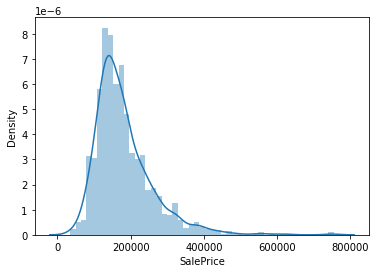

In [8]:
sns.distplot(df["SalePrice"])
plt.show()

From the above result, we can notice that "SalePrice" are not normal distribution. It is positively skewed.

A few people have very expensive house

# Relationship with Numerical variables

# Overall Quality

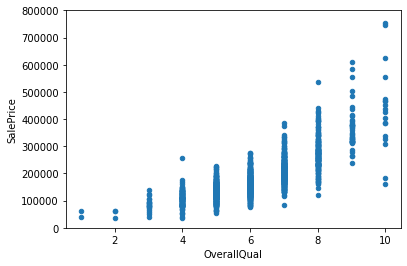

In [9]:
#Scatter plot OverallQual/SalePrice
data = pd.concat([df["SalePrice"], df["OverallQual"]], axis = 1)
data.plot.scatter(x="OverallQual", y="SalePrice", ylim=(0,800000));

From the above result, We can say that the price of the house will be high when the overall quality of the house is high. We can 
notice that for the same quality different price. Why? because "salePrice" is correlated with other variables and "OverallQual" might be
correlated with other variables.

# Year Built

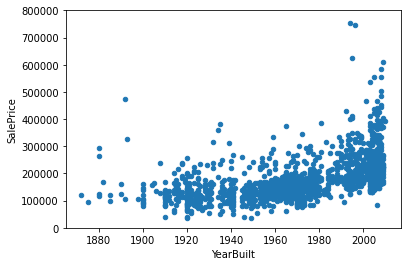

In [10]:
data = pd.concat([df["SalePrice"], df["YearBuilt"]], axis =1)
data.plot.scatter(x="YearBuilt", y="SalePrice", ylim=(0,800000));

From the above plot, We can observe that the price of a house is comparatively more than the house was built recently. we
also can notice that there are some outliers which means even if the house is too old, the price of the house is moderately high
due to influences of other variables.

# Ground Living Area

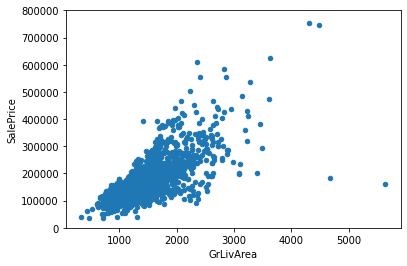

In [11]:
#scatter plot GrLivArea/SalePrice
data = pd.concat([df["SalePrice"], df["GrLivArea"]], axis =1)
data.plot.scatter(x="GrLivArea", y="SalePrice", ylim=(0,800000));

While the size of the ground living area is increasing, the price of the houses is increasing. But even if the ground living area is high, the price of the house is low and when the ground living area is high, the price of the house is too high. Why?.

We know the influence of the other variables affects the price change of house.

When "GrLivARea" of a house is highly correlated with other variables, the price of the house is increasing and when "GrLivArea" of a house is not highly correlated with other variables, the price of the house is decreasing.

# TotalBsmtSF

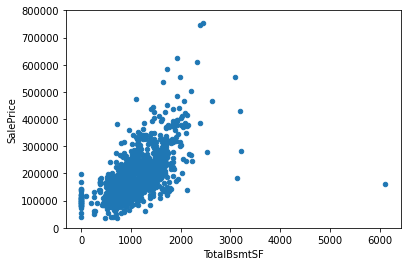

In [12]:
data = pd.concat([df["SalePrice"], df["TotalBsmtSF"]], axis =1)
data.plot.scatter(x="TotalBsmtSF", y="SalePrice", ylim=(0,800000));

We Can notice that "SalePrice" and "TotalBsmtSF" is with a linear relationship. We can see the value of "SalePrice" is going straight when the value of "TotalBsmtSF" is 0. Total square feet of basement area of a house is high but the price of the house is low due to influence of other variables.

# Visualizing Categorical Variables with "SalePrice".

## House Style

<AxesSubplot:title={'center':'SalePrice'}, xlabel='HouseStyle'>

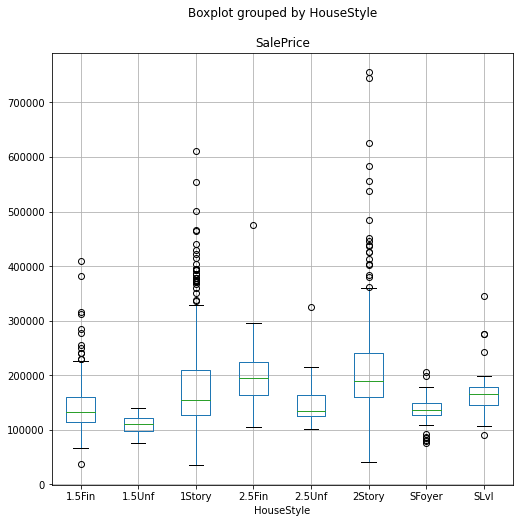

In [13]:
df.boxplot(column="SalePrice", #Column to plot
          by="HouseStyle",     #Column to split upon
          figsize=(8,8))

## Foundation

<AxesSubplot:title={'center':'SalePrice'}, xlabel='Foundation'>

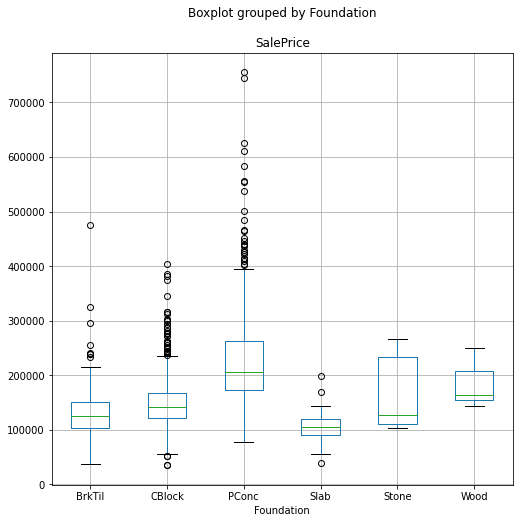

In [14]:
df.boxplot(column="SalePrice", #column to plot
          by="Foundation",     #column to split upon
          figsize=(8,8))

From  the above plot, We can observe that if a house has "Poured Concrete" foundation , the price of the house is higher than the other house prices.

## Garage Quality

<AxesSubplot:title={'center':'SalePrice'}, xlabel='GarageQual'>

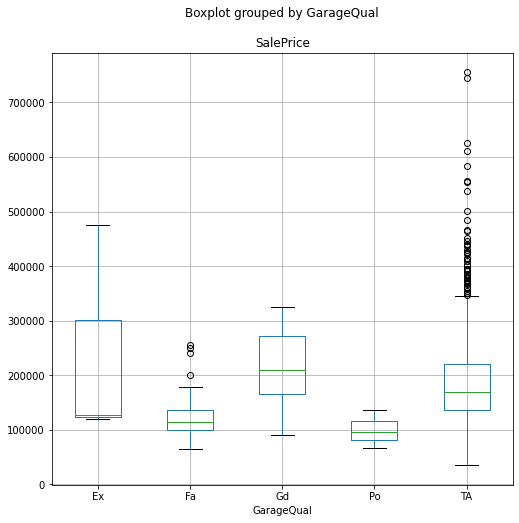

In [15]:
df.boxplot(column = "SalePrice",
          by="GarageQual",
          figsize=(8,8))

From the ove plot, We can observe that if a house has a good garage, the price of the house is higher than other huse prices. Some houses have an excellent garage. So the price of this kind of house is higher than all.


So far, We have compared some variables with the target variable. We observed that what is the variables impact on target variable based on EDA. If we want to reduce dimension We can take only variables. This is one kind of way.

### Now we will use PCA to reduce the dimension of this dataset.

# Before apply PCA we have to handle missing value.

In [16]:
total_missing_value = df.isnull().sum().sort_values(ascending=False)
total_missing_value

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64

# Imputing missing values

PoolQc: Data description says NA means "No Pool". In this data set, it has huge ratio of missing value(99%) and majority of house have no pool all in general.

In [17]:
df["PoolQC"] = df["PoolQC"].fillna("None")

## MiscFeature

Data description says NA means "no misc feature"

In [18]:
df["MiscFeature"] = df["MiscFeature"].fillna("None")

## Alley

Data description says NA means "no alley access"

In [19]:
df["Alley"] = df["Alley"].fillna("None")

## Fence

In [20]:
df["fence"] = df["Fence"].fillna("None")

## FireplaceQu

In [21]:
df["FireplaceQu"] = df["FireplaceQu"].fillna("None")

## LotFrontage

The area of each street connected to the house property most likely have a similar area to other houses in its neughborhood. so we can fill in missing values by the median LotFrontage of the neighborhood.

In [22]:
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

### GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None

In [23]:
for i in ("GarageType", "GarageFinish", "GarageQual", "GarageCond"):
    df[i] = df[i].fillna("None")

### GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = No cars in such garage.)

In [24]:
for i in ("GarageYrBlt", "GarageArea", "GarageCars"):
    df[i] = df[i].fillna(0)

BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement.

for i in ("BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath") :
df[i] = df[i].fillna(0)

#### BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement.    
    

In [25]:
for i in ("BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"):
    df[i] = df[i].fillna("None")

#### MasVnrArea and MasVnType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.

In [26]:
df["MasVnrType"] = df["MasVnrType"].fillna("None")
df["MasVnrArea"] = df["MasVnrType"].fillna(0)

#### MSZoning(The general zoning classification) : "RL" is by far the most common value. So we can fill in missing values with "RL" 

In [27]:
df["MSZoning"] = df["MSZoning"].fillna(df["MSZoning"].mode()[0])

#### Utilites : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA. Since the house with "NoSewa" is in the training set, this feature won't help in predictive modelling. We can then safely remove it.

In [28]:
df = df.drop(["Utilities"], axis = 1)

#### Functional : Data Description says NA means typical

In [29]:
df["Functional"] = df["Functional"].fillna("Typ")

#### Electrical : It has one NA value. Since this feature has mostly "SBrkr", we can set that for the missing value

In [30]:
df["Electrical"] = df["Electrical"].fillna(df["Electrical"].mode()[0])

#### KitchenQual : Only one NA value, and same as Electrical, we set "TA"(which is the most frequent) for the missing value in KitchenQual.

In [31]:
df["KitchenQual"] = df["KitchenQual"].fillna(df["KitchenQual"].mode()[0])

#### Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only on emisssing value. We will just substitute in the most common string.

In [32]:
df["Exterior1st"] = df["Exterior1st"].fillna(df["Exterior1st"].mode()[0])
df["Exterior2nd"] = df["Exterior2nd"].fillna(df["Exterior2nd"].mode()[0])

#### SaleType : Fill in again with most frequent which is "WD"

In [33]:
df["SaleType"] = df["SaleType"].fillna(df["SaleType"].mode()[0])

#### MSSubClass : NA most likely means No building class. We can replace missing values with None

In [33]:
df["MSSubClass"] = df["MSSubClass"].fillna("None")

In [34]:
categorical_var = df.dtypes[df.dtypes == "object"]

## Transforming Some numerical variables that are really categorical

In [35]:
df["OverallCond"].dtype

dtype('int64')

If we take the variable "OverallCond" which rates the overall condition of the house. So value of this coulmn is from 1 to 10.

              10 Very Excellent
              9  Excellent
              8  Very Good
              7  Good
              6  Above Average
              5  Average
              4  Below Average
              3  Fair
              2  Poor
              1  Very Poor
              
         The datatype of this column is in "int64", but is should be in categorical.   

In [36]:
#Changing OverallCond into a categorical variable
df["OverallCond"] = df["OverallCond"].astype(str)

In [37]:
#MSSubClass = The building class
df["MSSubClass"] = df["MSSubClass"].apply(str)

In [38]:
#Year and month sold are transformed into categorical features.
df["YrSold"] = df["YrSold"].astype(str)
df["MoSold"] = df["MoSold"].astype(str)

## Label Encoding to some Categorical variables that may contain information in their ordering set

In [39]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

In [40]:
#Process columns, apply LabelEncoder to categorical features
for c in cols:
    label_ec = LabelEncoder()
    label_ec.fit(list(df[c].values))
    df[c] = label_ec.transform(list(df[c].values))df

In [41]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,fence
0,1,9,RL,65.0,8450,1,1,3,Lvl,Inside,...,3,4,None,0,4,2,WD,Normal,208500,None
1,2,4,RL,80.0,9600,1,1,3,Lvl,FR2,...,3,4,None,0,7,1,WD,Normal,181500,None
2,3,9,RL,68.0,11250,1,1,0,Lvl,Inside,...,3,4,None,0,11,2,WD,Normal,223500,None
3,4,10,RL,60.0,9550,1,1,0,Lvl,Corner,...,3,4,None,0,4,0,WD,Abnorml,140000,None
4,5,9,RL,84.0,14260,1,1,0,Lvl,FR2,...,3,4,None,0,3,2,WD,Normal,250000,None


In [42]:
df = pd.get_dummies(df)
print(df.shape)

(1460, 230)


In [43]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,...,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,fence_GdPrv,fence_GdWo,fence_MnPrv,fence_MnWw,fence_None
0,1,9,65.0,8450,1,1,3,0,7,4,...,0,0,0,1,0,0,0,0,0,1
1,2,4,80.0,9600,1,1,3,0,6,7,...,0,0,0,1,0,0,0,0,0,1
2,3,9,68.0,11250,1,1,0,0,7,4,...,0,0,0,1,0,0,0,0,0,1
3,4,10,60.0,9550,1,1,0,0,7,4,...,0,0,0,0,0,0,0,0,0,1
4,5,9,84.0,14260,1,1,0,0,8,4,...,0,0,0,1,0,0,0,0,0,1


# Remove Target Variable

In [44]:
x = df.drop("SalePrice", axis=1)

# Standardizing input variables

In [45]:
from sklearn.preprocessing import StandardScaler
import numpy as np

#Standardized the dataset

sc_x= StandardScaler()
x_std = sc_x.fit_transform(x)

### PCA from scratch using pyhon

# 1. Computing the mean vector

##### Find the mean for each column

The mean vector is often referred to as the centroid and the variance-covariance matrix as the dispersion or dispersion matrix. 

The mean vector consists of the means of each variable.

In [46]:
import numpy as np

mean_vec = np.mean(x_std, axis = 0)

# 2. Computing the Covariance Matrix

##### Find the covariance among variables

The variance-covariance matrix consists of the variances of the variables along the main diagonal and the covariances between each pair of variables in the other matrix positions. Covariance Matrix: it is a symmetric, dxd matrix (where d is the number of features)

The diagonal entries of the covariance matrix are the variances and the other entries are the covariances. For this reason, the covariance matrix is sometimes called the _variance-covariance matrix_.

In [47]:
cov_mat = (x_std - mean_vec).T.dot((x_std - mean_vec))/ (x_std.shape[0]-1)

In [48]:
print(cov_mat)

[[ 1.0006854   0.01992535 -0.00338295 ... -0.02160409  0.00267991
   0.00667633]
 [ 0.01992535  1.0006854   0.23801249 ...  0.04081362  0.01486244
  -0.0779224 ]
 [-0.00338295  0.23801249  1.0006854  ...  0.0048497  -0.0018367
  -0.03100398]
 ...
 [-0.02160409  0.04081362  0.0048497  ...  1.0006854  -0.03026477
  -0.71150659]
 [ 0.00267991  0.01486244 -0.0018367  ... -0.03026477  1.0006854
  -0.1785926 ]
 [ 0.00667633 -0.0779224  -0.03100398 ... -0.71150659 -0.1785926
   1.0006854 ]]


# 3. Computing eigenvectors and corresponding eigenvalues

##### Find eigenvalues and eigenvectors

In [49]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [50]:
print(eig_vecs)

[[-9.17856379e-04+0.00000000e+00j -1.24882294e-03+0.00000000e+00j
  -3.11131613e-03+0.00000000e+00j ...  1.36956374e-17-7.63623297e-17j
   1.36956374e-17+7.63623297e-17j -2.60020747e-17+0.00000000e+00j]
 [-2.29183987e-02+0.00000000e+00j  3.18703150e-02+0.00000000e+00j
  -2.52766602e-01+0.00000000e+00j ... -3.78932514e-15+3.01426656e-15j
  -3.78932514e-15-3.01426656e-15j  5.56956483e-15+0.00000000e+00j]
 [ 8.10062083e-02+0.00000000e+00j -8.40341039e-02+0.00000000e+00j
  -1.85091166e-01+0.00000000e+00j ...  6.74291748e-16-2.84456139e-16j
   6.74291748e-16+2.84456139e-16j -1.11192609e-15+0.00000000e+00j]
 ...
 [-5.86509052e-02+0.00000000e+00j -7.04276675e-02+0.00000000e+00j
  -2.23056750e-02+0.00000000e+00j ... -1.47690999e-02+1.34285837e-02j
  -1.47690999e-02-1.34285837e-02j  2.76426867e-02+0.00000000e+00j]
 [-1.60999385e-02+0.00000000e+00j -2.31280269e-02+0.00000000e+00j
   5.46989922e-03+0.00000000e+00j ... -3.33263419e-03+2.32569288e-03j
  -3.33263419e-03-2.32569288e-03j  7.24831929e-

In [51]:
print(eig_vals)

[ 1.48104586e+01+0.00000000e+00j  7.24266808e+00+0.00000000e+00j
  6.23687284e+00+0.00000000e+00j  5.23636512e+00+0.00000000e+00j
  4.00179519e+00+0.00000000e+00j  3.95022252e+00+0.00000000e+00j
  3.75805049e+00+0.00000000e+00j  3.41623854e+00+0.00000000e+00j
  3.35409530e+00+0.00000000e+00j  3.17338064e+00+0.00000000e+00j
  2.98522832e+00+0.00000000e+00j  2.82183989e+00+0.00000000e+00j
  2.73619455e+00+0.00000000e+00j  2.64838958e+00+0.00000000e+00j
  2.57700063e+00+0.00000000e+00j  2.47416361e+00+0.00000000e+00j
  2.39208730e+00+0.00000000e+00j  2.38091795e+00+0.00000000e+00j
  2.34191651e+00+0.00000000e+00j  2.23653347e+00+0.00000000e+00j
  2.19686069e+00+0.00000000e+00j  2.17359399e+00+0.00000000e+00j
  2.13010426e+00+0.00000000e+00j  2.11705845e+00+0.00000000e+00j
  2.08764623e+00+0.00000000e+00j  2.04849947e+00+0.00000000e+00j
  2.00782724e+00+0.00000000e+00j  1.99904615e+00+0.00000000e+00j
  1.92347836e+00+0.00000000e+00j  1.90333427e+00+0.00000000e+00j
  1.88226422e+00+0.000000

If eigen value is high for eigen vector that means vector has a lot of variance.

# 4.Sorting the eigenvectors by decreasing eigenvalues

In [52]:
# Make a list of (eigenvalue, eigenvectors) tuples
eig_pairs = [[np.abs(eig_vals[i]), eig_vecs[:,i]] for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print("Eigenvalues in descending order:")
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
14.81045855157065
7.242668084484282
6.236872843651717
5.236365122826523
4.001795194279797
3.9502225162730857
3.7580504881491836
3.416238535546677
3.3540953015516775
3.1733806417071295
2.985228315329095
2.8218398861169502
2.736194554877191
2.6483895770329635
2.5770006316445855
2.474163608038213
2.3920873023182088
2.3809179476275184
2.341916507780576
2.23653346702873
2.1968606899089957
2.173593987823785
2.130104260289135
2.117058454247549
2.087646228478544
2.0484994727200103
2.007827236881747
1.9990461509071378
1.923478355790852
1.903334272078964
1.8822642216284664
1.8762127658381111
1.8174002445872512
1.7965042371619866
1.7758347615759595
1.7310288667688656
1.6828848703263637
1.6644783385099418
1.609080799735281
1.5957976256545108
1.5482826575703326
1.532696846300201
1.512757253573149
1.5035742375149377
1.4815231126370876
1.462484844541481
1.4428797317069382
1.4301777489241645
1.4094960010329678
1.4051656718101302
1.3819721314865907
1.3639045429624148
1.

All the eigen values are sorted in an descending order.

# 5. Select components based on eigen values

we have 229 components from which we have to select components based on eigen value which has high value.

Here, filter out eigen values which has above 0.5

In [53]:
pairs = np.array(eig_pairs)
count = 0
components = []

for i in range(len(eig_pairs)):
    if eig_pairs[i][0]>0.5:
        count += 1
        components.append(pairs[i])
        
print("Number of components:" + str(count))   


Number of components:141


When we select eigen value as 0.5 or above 0.5, we get 141 components. 0.5 is not a threshold eigen value. we use this value to check the percentage of information the selected components carry. if the selected components gives  less information, we select more components and this can be achieved by setting eigen value below 0.5.

### Let's check how much information the selected components contains.

In [54]:
#Calculate Explained Variance
total = 0
ein = []
for i in range(len(components)):
    total += components[i][0]
    ein.append(components[i][0])
    
#divide eigen value by total eigen value and then multiple with 100 for the selected components     
var_exp = [(i/ sum(eig_vals))*100 for i in sorted(ein, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [55]:
cum_var_exp

array([ 6.46301939+0.j,  9.62359029+0.j, 12.34525012+0.j, 14.63030626+0.j,
       16.37661816+0.j, 18.10042466+0.j, 19.74037072+0.j, 21.23115615+0.j,
       22.69482339+0.j, 24.07962998+0.j, 25.38233026+0.j, 26.61373075+0.j,
       27.80775715+0.j, 28.96346702+0.j, 30.08802403+0.j, 31.16770481+0.j,
       32.21156895+0.j, 33.25055899+0.j, 34.27252949+0.j, 35.24851272+0.j,
       36.20718346+0.j, 37.15570103+0.j, 38.08524045+0.j, 39.00908692+0.j,
       39.92009842+0.j, 40.81402697+0.j, 41.69020689+0.j, 42.5625549 +0.j,
       43.40192648+0.j, 44.23250753+0.j, 45.053894  +0.j, 45.87263971+0.j,
       46.66572069+0.j, 47.44968303+0.j, 48.22462558+0.j, 48.98001564+0.j,
       49.71439651+0.j, 50.44074511+0.j, 51.14291921+0.j, 51.83929677+0.j,
       52.51493965+0.j, 53.18378116+0.j, 53.84392138+0.j, 54.50005431+0.j,
       55.14656451+0.j, 55.78476676+0.j, 56.41441368+0.j, 57.03851769+0.j,
       57.65359655+0.j, 58.26678573+0.j, 58.86985367+0.j, 59.46503723+0.j,
       60.05040982+0.j, 6

We can notice that 141 components has 93.8% information among all components.

When we select 141 components we lose 6.2% information.

# 6. Select components based on scree plot

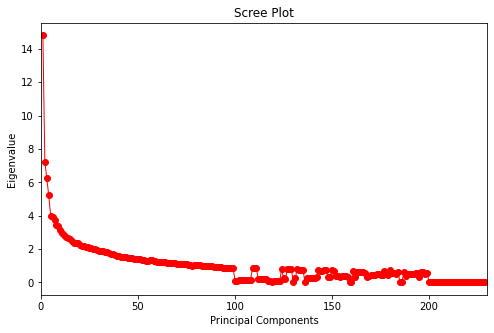

In [56]:
#import numpy as np
#import matplotlib
#import matplotlib.pyplot as plt

#Make a random array and then make it positive-definite
num_vars = len(eig_vals)
num_obs = 9

fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(num_vars) + 1 
plt.plot(sing_vals, eig_vals, "ro-", linewidth=1)

plt.title("Scree Plot")
plt.xlabel("Principal Components")
plt.ylabel("Eigenvalue")
plt.xlim(0,230)
plt.show()

Scree Plot shows eigen value for each components. starting components has high value and in middle, some component has higher than others. What can we do using scree plot ? We can select components based scree plot. If we select 150 components based on scree plot, we have to check how much information has the selected components.

The following plot to shows percentage of variance explained by each of the selected components.

In [57]:
#Calculate Explained Variance
total = sum(eig_vals)

#Divide eigen value by total eigen value and then multiple with 100 for the selected components
var_exp = [(i / total)*100 for i in sorted(eig_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)

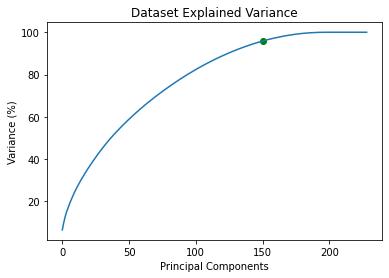

In [58]:
plt.figure()
plt.scatter([150], [cum_var_exp[150]], color='g')
plt.plot(cum_var_exp)
plt.xlabel("Principal Components")
plt.ylabel("Variance (%)") #for each components
plt.title("Dataset Explained Variance")
plt.show()

From the above plot, we can observe that the variance remains constant after the number of components reaches 150

In [59]:
cum_var_exp[150]

(95.84221910217515+0j)

From the above result, We can see that the selected 150 components has 96% information. Here we lose 4% information. We have to select less component than original variable, at the same time, the selected component must contain as much as information.

# 7. Deriving the new Data Set

##### Finally, We select only 150 components. Filter out eigen vector of the selected components.

In [60]:
N = 229
M = 150

a = np.ndarray(shape = (N, 0))
for i in range(M):
    b = eig_pairs[i][1].reshape(N,1)
    a = np.hstack((a,b))

### Perform matrix calculation of original dataset with eigen vector of the selected components.

In [61]:
a

array([[-0.00091786+0.j, -0.00124882+0.j, -0.00311132+0.j, ...,
        -0.04737578+0.j, -0.01984383+0.j, -0.03907232+0.j],
       [-0.0229184 +0.j,  0.03187032+0.j, -0.2527666 +0.j, ...,
         0.10177794+0.j, -0.00084618+0.j, -0.0109117 +0.j],
       [ 0.08100621+0.j, -0.0840341 +0.j, -0.18509117+0.j, ...,
         0.00117074+0.j, -0.03951735+0.j,  0.12363688+0.j],
       ...,
       [-0.05865091+0.j, -0.07042767+0.j, -0.02230567+0.j, ...,
        -0.01029324+0.j, -0.01732139+0.j,  0.04205054+0.j],
       [-0.01609994+0.j, -0.02312803+0.j,  0.0054699 +0.j, ...,
        -0.01144344+0.j, -0.00333548+0.j,  0.02706349+0.j],
       [ 0.07349467+0.j,  0.1117102 +0.j,  0.04853134+0.j, ...,
         0.00741008+0.j,  0.00965227+0.j, -0.0232443 +0.j]])

In [62]:
# Projection onto the new feature space
Y = x_std.dot(a)

In [64]:
Y

array([[ 3.37881956+0.j,  0.83126798+0.j,  0.14126206+0.j, ...,
         0.05264885+0.j, -0.11488625+0.j,  0.0546108 +0.j],
       [-0.49014982+0.j, -2.54440034+0.j,  0.55360824+0.j, ...,
        -1.50686946+0.j,  0.13730069+0.j, -0.49557642+0.j],
       [ 3.70006074+0.j,  0.46216915+0.j, -0.10774618+0.j, ...,
        -0.26513806+0.j, -0.21907631+0.j,  0.12865672+0.j],
       ...,
       [-0.19576961+0.j,  1.05012274+0.j, -3.96173083+0.j, ...,
        -0.30930739+0.j,  0.54681933+0.j,  0.34200916+0.j],
       [-3.03068159+0.j, -2.58873065+0.j,  1.93282496+0.j, ...,
         0.67055862+0.j,  0.09255241+0.j,  0.70546917+0.j],
       [-0.99253283+0.j, -3.15321751+0.j,  1.10195506+0.j, ...,
         0.9994003 +0.j,  0.12780606+0.j, -0.40775836+0.j]])

In [63]:
Y.shape

(1460, 150)

We reduced the number of columns from 221 to 150.